In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Métrica de evaluación
def RMSLE(actual, pred):
    return (np.mean((np.log(actual + 1) - np.log(pred + 1)) ** 2)) **.5

# Set de pruebas

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

In [4]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [6]:
print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [10]:
y_pred = classifier.predict(X_test)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 9  0  0]
 [ 0  8  1]
 [ 0  0 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [12]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

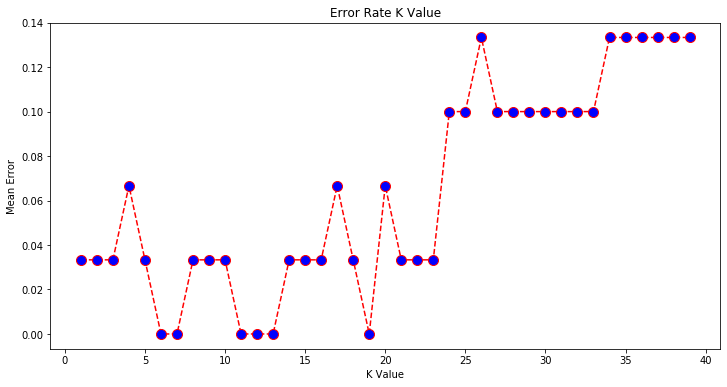

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [14]:
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 9  0  0]
 [ 0  9  0]
 [ 0  1 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



# Set del TP

In [15]:
#Archivos de train y test
df_train = pd.read_csv("data/train.csv", index_col=0)
df_submit = pd.read_csv("data/test.csv", index_col=0)

In [16]:
df_train.tipodepropiedad = df_train.tipodepropiedad.astype('category').cat.codes
df_train.ciudad = df_train.ciudad.astype('category').cat.codes
df_train.provincia = df_train.provincia.astype('category').cat.codes
df_train.fecha = pd.to_datetime(df_train.fecha)
df_train.fecha = df_train.fecha.dt.year



In [17]:
df_train=df_train.drop(columns=['titulo','descripcion','direccion', 'lat', 'lng'])
df_train.antiguedad = df_train.antiguedad.fillna(0)
df_train.habitaciones = df_train.habitaciones.fillna(0)
df_train.garages = df_train.garages.fillna(0)
df_train.banos = df_train.banos.fillna(0)
df_train.dropna(subset=['idzona'],inplace=True)
df_train['metrostotales'].fillna(df_train['metroscubiertos'], inplace=True)
df_train['metroscubiertos'].fillna(0, inplace=True)


In [18]:
numeric_columns_with_nulls = list(set(df_train.columns[df_train.isnull().sum() > 0].tolist()))
print(numeric_columns_with_nulls)

[]


In [19]:
X = df_train.iloc[:, :-1].values
y = df_train.precio.values

In [20]:
print(df_train.head())
print(X)

        tipodepropiedad  ciudad  provincia  antiguedad  habitaciones  garages  \
id                                                                              
254099                0      93          8         0.0           2.0      1.0   
53461                 3     370          8        10.0           3.0      2.0   
247984                2     767         14         5.0           3.0      2.0   
209067                2     861         10         1.0           2.0      1.0   
185997                0     851         14        10.0           2.0      1.0   

        banos  metroscubiertos  metrostotales   idzona  fecha  gimnasio  \
id                                                                        
254099    2.0             80.0           80.0  23533.0   2015       0.0   
53461     2.0            268.0          180.0  24514.0   2013       0.0   
247984    2.0            144.0          166.0  48551.0   2015       0.0   
209067    1.0             63.0           67.0  53666.0   

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
error = []
calcRange = (5, 15)
# Calculating error for K values between 1 and 40
for i in range(calcRange[0],calcRange[1]):
    print(i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

5
6
7
8
9
10
11
12
13
14


Text(0, 0.5, 'Mean Error')

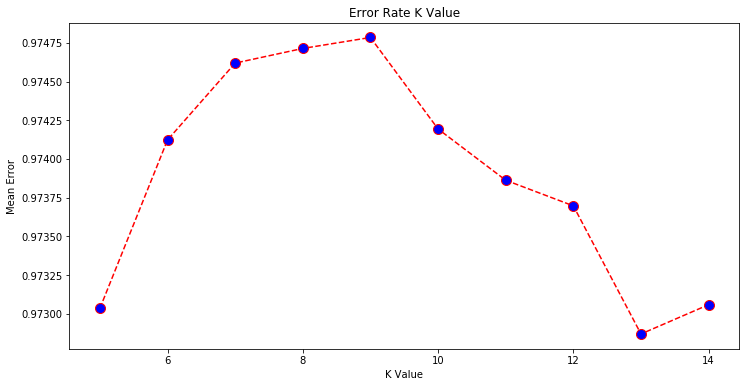

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(range(calcRange[0],calcRange[1]), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')